In [5]:
!pip install inference supervision opencv-python

^C


  Using cached inference-0.22.2-py3-none-any.whl.metadata (14 kB)
Using cached inference-0.22.2-py3-none-any.whl (725 kB)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


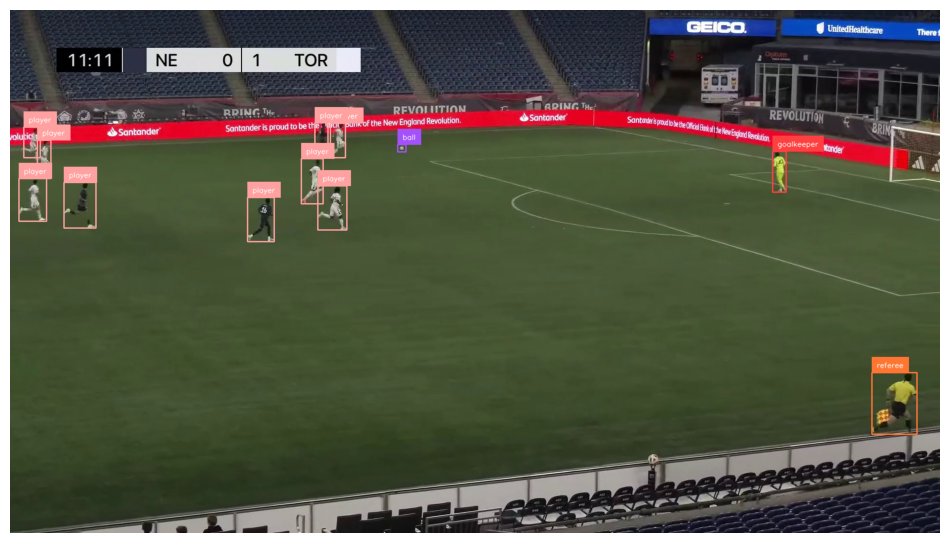

In [29]:
from inference import get_model
import supervision as sv
import cv2

# define the image url to use for inference
image_file = "images/frame350.jpg"
image = cv2.imread(image_file)

# load a pre-trained yolov8n model
model = get_model(model_id="soccer-computer-vision-acffy/2")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)


In [43]:
import supervision as sv
from IPython.display import clear_output

sourceVideoPath = "C:\\Users\\isss1\\OneDrive\\Documents\\Wondershare\\Wondershare Filmora\\Output\\clip_2.mp4"

boxAnnotator = sv.BoxAnnotator()
labelAnnotator = sv.LabelAnnotator()

frameGenerator = sv.get_video_frames_generator(sourceVideoPath)

for frame in frameGenerator:
    result = model.infer(frame, confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)

    labels = [f"{className} {confidence:.2f}" for className, confidence in zip(detections['class_name'], detections.confidence)]

    annotatedFrame = frame.copy()
    annotatedFrame = boxAnnotator.annotate(scene=annotatedFrame, detections=detections)
    annotatedFrame = labelAnnotator.annotate(scene=annotatedFrame, detections=detections, labels=labels)

    sv.plot_image(annotatedFrame)
    clear_output(wait=True)

KeyboardInterrupt: 